In [1]:
# Dependencies
import requests
from config import api_key

url = "https://api.themoviedb.org/3/movie/"

In [3]:
import pprint
import random
movies_rating = []
movies_genre = []
movies_budget = []
movies_revenue = []
movies_title = []
movies_date = []
movies_runtime = []
movies_country = []

for movieid in range(0,2000):
    #random.randint(a, b)
    query_url = f"{url}{movieid+200}?api_key={api_key}"
    #query_url = f"{url}{movieid+121}?api_key={api_key}"
    # create query with page number
    
    movies = requests.get(query_url).json()
   
    #for article in articles['budget']:
    #    article.dropna(inplace=True)
    try:
        movies_rating.append(movies["popularity"])
        movies_genre.append(movies["genres"][0]['name'])
        movies_budget.append(movies['budget'])
        movies_revenue.append(movies['revenue'])
        movies_title.append(movies['original_title'])
        movies_date.append(movies['release_date'])
        movies_runtime.append(movies['runtime'])
        movies_country.append(movies["production_countries"][0]['name'])
    except:
        # Append null values
        print("Character not found")
        pass

Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found
Character not found


In [4]:
type(movies_rating)

list

In [17]:
del movies_rating[-1]
len(movies_rating)

1363

In [19]:
del movies_genre[-1]
len(movies_genre)

1363

In [21]:
del movies_budget[-1]
len(movies_budget)

1363

In [30]:
del movies_revenue[-1]
len(movies_revenue)

1363

In [23]:
del movies_title[-1]
len(movies_title)

1363

In [25]:
del movies_date[-1]
len(movies_date)

1363

In [27]:
del movies_runtime[-1]
len(movies_runtime)

1363

In [5]:
len(movies_country)

1363

In [31]:
import pandas as pd
movie_df = pd.DataFrame()

movie_df['popularity'] = movies_rating
movie_df['budget'] = movies_budget
movie_df['revenue'] = movies_revenue
movie_df['genre'] = movies_genre
movie_df['title'] = movies_title
movie_df['release date'] = movies_date
movie_df['run time'] = movies_runtime
movie_df['movies_country'] = movies_country

In [32]:
movie_df

,popularity,budget,revenue,genre,title,release date,run time,movies_country
0,17.384,70000000,118000000,Science Fiction,Star Trek: Insurrection,1998-12-11,103,United States of America
1,18.760,60000000,67312826,Science Fiction,Star Trek: Nemesis,2002-12-13,117,United States of America
2,11.853,500000,3000000,Drama,Mean Streets,1973-10-14,112,United States of America
3,11.150,0,0,Drama,Le Salaire de la peur,1953-04-22,153,France
4,16.210,17500000,38000000,Drama,Hotel Rwanda,2004-03-04,121,Italy
...,...,...,...,...,...,...,...,...
1358,1.084,0,0,Action,"Sandok, il Maciste della giungla",1964-03-28,85,Germany
1359,3.298,0,22587000,Comedy,My Tutor,1983-03-04,97,United Kingdom
1360,2.259,0,0,Comedy,Nichts bereuen,2001-11-15,104,Belgium
1361,0.699,0,0,Drama,Beste Zeit,2007-07-26,95,Germany


In [33]:
movie_df['release date'] = pd.to_datetime(movie_df['release date'])

In [34]:
movie_new_df = movie_df[movie_df["movies_country"].str.contains('United')] 

In [35]:
movie_new_df

,popularity,budget,revenue,genre,title,release date,run time,movies_country
0,17.384,70000000,118000000,Science Fiction,Star Trek: Insurrection,1998-12-11,103,United States of America
1,18.760,60000000,67312826,Science Fiction,Star Trek: Nemesis,2002-12-13,117,United States of America
2,11.853,500000,3000000,Drama,Mean Streets,1973-10-14,112,United States of America
6,28.522,16400000,235860116,Drama,Dead Poets Society,1989-06-02,128,United States of America
8,11.360,1120175,0,Comedy,Arsenic and Old Lace,1944-09-01,118,United States of America
...,...,...,...,...,...,...,...,...
1350,0.844,0,0,Documentary,Hindenburg Disaster: Probable Cause,2001-01-01,50,United States of America
1353,0.709,1600,0,Horror,Within the Woods,1978-10-30,32,United States of America
1356,3.949,0,14100000,Comedy,Tomboy,1985-11-14,91,United States of America
1359,3.298,0,22587000,Comedy,My Tutor,1983-03-04,97,United Kingdom


In [36]:
#international movies after year 2000
start_date = '2000-01-01'
end_date = '2021-11-18'
# Select DataFrame rows between two dates
mask = (movie_df['release date'] > start_date) & (movie_df['release date'] <= end_date)
movie_filtered_international = movie_df.loc[mask]
movie_filtered_international

,popularity,budget,revenue,genre,title,release date,run time,movies_country
1,18.760,60000000,67312826,Science Fiction,Star Trek: Nemesis,2002-12-13,117,United States of America
4,16.210,17500000,38000000,Drama,Hotel Rwanda,2004-03-04,121,Italy
5,3.340,0,0,Drama,Paradise Found,2003-01-01,89,Australia
7,0.980,0,0,Comedy,Berlin is in Germany,2001-11-01,97,Germany
10,29.989,10000000,164874275,Horror,Saw III,2006-10-27,114,United States of America
...,...,...,...,...,...,...,...,...
1355,6.749,0,0,Music,The Corrs: Live at Lansdowne Road,2000-11-10,87,France
1357,0.717,4000000,0,Science Fiction,Stranded,2001-09-24,95,Germany
1360,2.259,0,0,Comedy,Nichts bereuen,2001-11-15,104,Belgium
1361,0.699,0,0,Drama,Beste Zeit,2007-07-26,95,Germany


In [37]:
#US movies after year 2000
start_date = '2000-01-01'
end_date = '2021-11-18'
# Select DataFrame rows between two dates
mask = (movie_new_df['release date'] > start_date) & (movie_new_df['release date'] <= end_date)
movie_filtered = movie_new_df.loc[mask]
movie_filtered

,popularity,budget,revenue,genre,title,release date,run time,movies_country
1,18.760,60000000,67312826,Science Fiction,Star Trek: Nemesis,2002-12-13,117,United States of America
10,29.989,10000000,164874275,Horror,Saw III,2006-10-27,114,United States of America
11,25.471,4000000,147748505,Horror,Saw II,2005-10-28,89,United States of America
13,36.435,185000000,786636033,Adventure,Indiana Jones and the Kingdom of the Crystal S...,2008-05-21,122,United States of America
26,10.983,50000000,93974620,Drama,Syriana,2005-11-23,128,United States of America
...,...,...,...,...,...,...,...,...
1337,7.931,850000,0,Drama,2:37,2006-05-26,91,United States of America
1343,4.163,0,0,Documentary,Wirklich alles?!,2002-11-30,65,United States of America
1346,11.841,22000000,13405595,Comedy,Tenacious D in The Pick of Destiny,2006-11-22,93,United States of America
1350,0.844,0,0,Documentary,Hindenburg Disaster: Probable Cause,2001-01-01,50,United States of America


In [38]:
#International movies
import matplotlib.pyplot as plt
import numpy as np
#movie_df2=movie_df.sort_values(['rating'],ascending=False).groupby('genre')
inter=movie_filtered_international.groupby('genre', as_index=False)['popularity'].mean()
inter

,genre,popularity
0,Action,24.296107
1,Adventure,56.846282
2,Animation,39.361231
3,Comedy,12.906109
4,Crime,14.736360
5,Documentary,8.083292
6,Drama,15.735506
7,Family,23.818500
8,Fantasy,24.015933
9,History,11.894333


/Users/royjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Science Fiction'),
  Text(1, 0, 'Drama'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Horror'),
  Text(4, 0, 'Adventure'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Action'),
  Text(7, 0, 'Fantasy'),
  Text(8, 0, 'Documentary'),
  Text(9, 0, 'Romance'),
  Text(10, 0, 'Thriller'),
  Text(11, 0, 'Animation'),
  Text(12, 0, 'Mystery'),
  Text(13, 0, 'Family'),
  Text(14, 0, 'Music'),
  Text(15, 0, 'History'),
  Text(16, 0, 'War'),
  Text(17, 0, 'Western')])

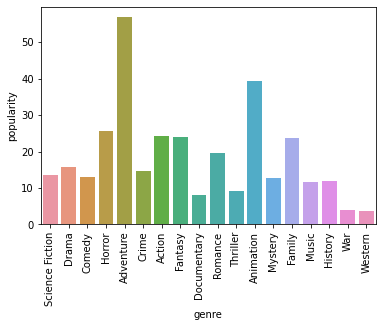

In [39]:
#international movies after 2000
import seaborn as sns
p = sns.barplot('genre', 'popularity', data=movie_filtered_international, ci=False)
plt.xticks(rotation=90)

In [40]:
inter2 = inter.sort_values(['popularity'],ascending=False)
inter2_top5 = inter2.iloc[:5]

In [64]:
inter2

,genre,popularity
1,Adventure,56.846282
2,Animation,39.361231
10,Horror,25.640414
0,Action,24.296107
8,Fantasy,24.015933
7,Family,23.818500
13,Romance,19.642000
6,Drama,15.735506
4,Crime,14.736360
14,Science Fiction,13.553111


In [41]:
inter2_top5

,genre,popularity
1,Adventure,56.846282
2,Animation,39.361231
10,Horror,25.640414
0,Action,24.296107
8,Fantasy,24.015933


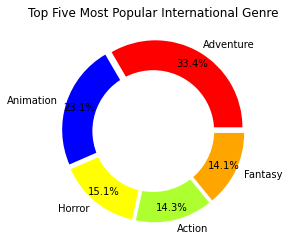

In [54]:
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500'] 
# Pie Chart
plt.pie(inter2_top5['popularity'], colors=colors, labels=inter2_top5['genre'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Top Five Most Popular International Genre')
  
# Displaying Chart
plt.show()

In [44]:
#US movies
import matplotlib.pyplot as plt
import numpy as np
#movie_df2=movie_df.sort_values(['rating'],ascending=False).groupby('genre')budget
test = movie_filtered.groupby('genre', as_index=False)['popularity'].mean()
test

,genre,popularity
0,Action,29.665613
1,Adventure,78.821080
2,Animation,46.449500
3,Comedy,15.271205
4,Crime,18.444333
5,Documentary,9.599143
6,Drama,15.467333
7,Family,11.224000
8,Fantasy,39.682571
9,History,7.612000


/Users/royjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Action'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Animation'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Crime'),
  Text(5, 0, 'Documentary'),
  Text(6, 0, 'Drama'),
  Text(7, 0, 'Family'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'History'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'Music'),
  Text(12, 0, 'Mystery'),
  Text(13, 0, 'Romance'),
  Text(14, 0, 'Science Fiction'),
  Text(15, 0, 'Thriller'),
  Text(16, 0, 'War'),
  Text(17, 0, 'Western')])

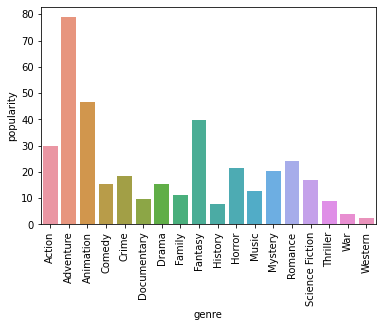

In [56]:
#US movies after 2000
import seaborn as sns
p = sns.barplot('genre', 'popularity', data=test, ci=False)
plt.xticks(rotation=90)

In [46]:
test_2 = test.sort_values(['popularity'],ascending=False)
test_2_top5 = test_2.iloc[:5]

In [73]:
type(test_2)

pandas.core.frame.DataFrame

In [65]:
test_2

,genre,popularity
1,Adventure,78.821080
2,Animation,46.449500
8,Fantasy,39.682571
0,Action,29.665613
13,Romance,24.231000
10,Horror,21.352250
12,Mystery,20.292000
4,Crime,18.444333
14,Science Fiction,17.080500
6,Drama,15.467333


In [51]:
test_2_top5

,genre,popularity
1,Adventure,78.821080
2,Animation,46.449500
8,Fantasy,39.682571
0,Action,29.665613
13,Romance,24.231000


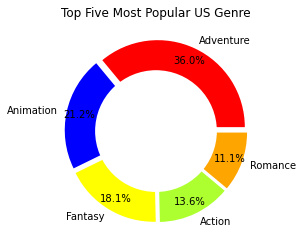

In [53]:
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500']  
# Pie Chart
plt.pie(test_2_top5['popularity'], colors=colors, labels=test_2_top5['genre'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Top Five Most Popular US Genre')
  
# Displaying Chart
plt.show()

In [57]:
genre_group = test.groupby('genre')
genre_group.head()

,genre,popularity
0,Action,29.665613
1,Adventure,78.821080
2,Animation,46.449500
3,Comedy,15.271205
4,Crime,18.444333
5,Documentary,9.599143
6,Drama,15.467333
7,Family,11.224000
8,Fantasy,39.682571
9,History,7.612000


In [60]:
genre_group.head(10)

,genre,popularity
0,Action,29.665613
1,Adventure,78.821080
2,Animation,46.449500
3,Comedy,15.271205
4,Crime,18.444333
5,Documentary,9.599143
6,Drama,15.467333
7,Family,11.224000
8,Fantasy,39.682571
9,History,7.612000


In [72]:
genreUS = movie_filtered.groupby('genre')
genreUS.head(2)

,popularity,budget,revenue,genre,title,release date,run time,movies_country
1,18.760,60000000,67312826,Science Fiction,Star Trek: Nemesis,2002-12-13,117,United States of America
10,29.989,10000000,164874275,Horror,Saw III,2006-10-27,114,United States of America
11,25.471,4000000,147748505,Horror,Saw II,2005-10-28,89,United States of America
13,36.435,185000000,786636033,Adventure,Indiana Jones and the Kingdom of the Crystal S...,2008-05-21,122,United States of America
26,10.983,50000000,93974620,Drama,Syriana,2005-11-23,128,United States of America
38,11.638,30000000,47126295,Drama,High Fidelity,2000-03-17,113,United Kingdom
65,51.550,150000000,374218673,Action,Batman Begins,2005-06-10,140,United Kingdom
76,90.964,300000000,961000000,Adventure,Pirates of the Caribbean: At World's End,2007-05-19,169,United States of America
83,10.167,3000000,11718595,Comedy,Dave Chappelle's Block Party,2005-09-12,100,United States of America
88,17.605,85000000,311312624,Crime,Ocean's Thirteen,2007-06-06,122,United States of America


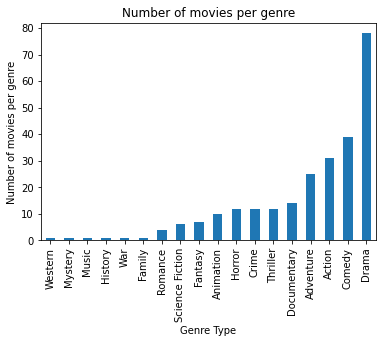

<Figure size 432x288 with 0 Axes>

In [73]:
movie_chart = genreUS['genre'].count()
movie_chart_sorted = movie_chart.sort_values()
movie_genre_count = movie_chart_sorted.plot(kind="bar", title="Number of movies per genre")
movie_genre_count.set_xlabel("Genre Type")
movie_genre_count.set_ylabel("Number of movies per genre")

#plt.xticks(rotation=45)
plt.show()
plt.tight_layout()


In [74]:
movie_chart_sorted

genre
Western             1
Mystery             1
Music               1
History             1
War                 1
Family              1
Romance             4
Science Fiction     6
Fantasy             7
Animation          10
Horror             12
Crime              12
Thriller           12
Documentary        14
Adventure          25
Action             31
Comedy             39
Drama              78
Name: genre, dtype: int64

/Users/royjiang/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Science Fiction'),
  Text(1, 0, 'Horror'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Drama'),
  Text(4, 0, 'Action'),
  Text(5, 0, 'Comedy'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Fantasy'),
  Text(8, 0, 'Thriller'),
  Text(9, 0, 'Animation'),
  Text(10, 0, 'Documentary'),
  Text(11, 0, 'Romance'),
  Text(12, 0, 'Family'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'History'),
  Text(15, 0, 'War'),
  Text(16, 0, 'Western'),
  Text(17, 0, 'Music')])

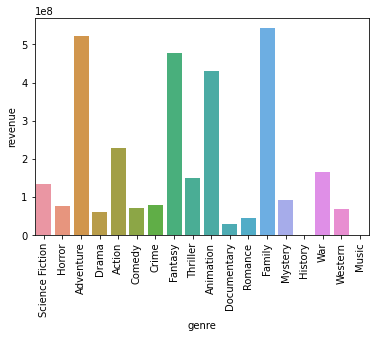

In [75]:
movie_filtered.groupby('genre', as_index=False)['revenue'].mean()
p = sns.barplot('genre', 'revenue', data=movie_filtered, ci=False)
plt.xticks(rotation=90)

In [78]:
movie_filtered.groupby('genre', as_index=False)['revenue'].mean()

,genre,revenue
0,Action,2.276426e+08
1,Adventure,5.229660e+08
2,Animation,4.295620e+08
3,Comedy,7.295078e+07
4,Crime,7.889670e+07
5,Documentary,2.869907e+07
6,Drama,6.167944e+07
7,Family,5.420638e+08
8,Fantasy,4.775273e+08
9,History,0.000000e+00


In [79]:
movie_filtered.groupby('genre', as_index=False)['budget'].mean()

,genre,budget
0,Action,7.795161e+07
1,Adventure,1.286800e+08
2,Animation,8.840000e+07
3,Comedy,1.771282e+07
4,Crime,2.854167e+07
5,Documentary,7.607299e+05
6,Drama,2.288881e+07
7,Family,7.500000e+07
8,Fantasy,1.107143e+08
9,History,3.000000e+07


In [8]:
movies

{'adult': False,
 'backdrop_path': '/cL1VX6WllejQQhGTUGGWHW25yor.jpg',
 'belongs_to_collection': None,
 'budget': 12000000,
 'genres': [{'id': 80, 'name': 'Crime'},
  {'id': 18, 'name': 'Drama'},
  {'id': 53, 'name': 'Thriller'}],
 'homepage': 'http://www.office-kitano.co.jp/brother/index.html',
 'id': 327,
 'imdb_id': 'tt0222851',
 'original_language': 'en',
 'original_title': 'Brother',
 'overview': 'A Japanese Yakuza gangster’s deadly existence in his homeland gets him exiled to Los Angeles, where he is taken in by his little brother and his brother’s gang.',
 'popularity': 11.479,
 'poster_path': '/rjgNhmndEKCPiIxK14bTr2FiwYR.jpg',
 'production_companies': [{'id': 528,
   'logo_path': '/fO3Aof3lXQclYpBByYC8aneTXwA.png',
   'name': 'Bandai Visual',
   'origin_country': 'JP'},
  {'id': 567,
   'logo_path': None,
   'name': 'Office Kitano',
   'origin_country': 'JP'},
  {'id': 569,
   'logo_path': '/hOurQBeeFI4OTTdAEtvGflbJgXU.png',
   'name': 'Tokyo FM',
   'origin_country': 'JP'},
 

In [44]:
movie_filtered.to_csv("US_movies_after2000.csv", index=False)

In [40]:
movie_df.to_csv("international_movies.csv", index=False)